<a href="https://colab.research.google.com/github/peajangid/DL-Projects-/blob/main/FashionAI_Fashion_recommender_using_CNN_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"priyajangiddata","key":"035b4738d898d58c0f73959f8525cd3d"}'}

In [ ]:
!mkdir -p ~/.kaggle                   # make a kaggle dir
!cp kaggle.json ~/.kaggle/              # copy kaggle.json to the kaggle dir
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!mkdir -p ~/.kaggle                   # make a kaggle dir
!cp kaggle.json ~/.kaggle/              # copy kaggle.json to the kaggle dir
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d paramaggarwal/fashion-product-images-small

Dataset URL: https://www.kaggle.com/datasets/paramaggarwal/fashion-product-images-small
License(s): MIT
 97% 549M/565M [00:08<00:00, 34.7MB/s]
100% 565M/565M [00:08<00:00, 68.5MB/s]


In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from zipfile import ZipFile
import os

zip_file_path = r'/content/fashion-product-images-small.zip'

extraction_directory = r'/content/myntradataset'

if not os.path.exists(extraction_directory):
    os.makedirs(extraction_directory)

with ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall()
    print("Extraction completed successfully.")


Extraction completed successfully.


In [ ]:
path,dirs,files = next(os.walk(r'/content/myntradataset/images'))
file_count = len(files)
print(file_count)

44441


In [ ]:
# printig the name of images
extracted_directory_updated = os.path.join(extraction_directory,'images')
extracted_files_updated = os.listdir(r'/content/myntradataset/images')
extracted_files_updated[2]

'40744.jpg'

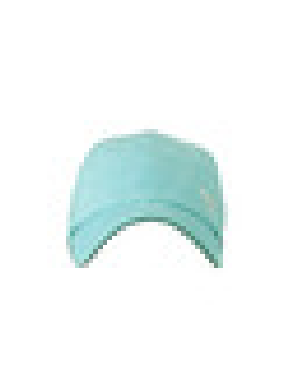

In [ ]:
# Displaying the 1st image
from PIL import Image

# function to load and display an image
def display_image(filepath):
    image = Image.open(filepath)
    plt.imshow(image)
    plt.axis('off')
    plt.show()
file_path = os.path.join(extracted_directory_updated,extracted_files_updated[2])
display_image(file_path)

In [ ]:
# Now creating a list of all image file paths for further use
import glob
# directory path containing images
image_directory = r'/content/myntradataset/images'

# list of image paths
image_path = [file for file in glob.glob(os.path.join(image_directory,'*.*',)) if file.endswith(('.jpg','.png','.jpeg','.wepb'))]

In [ ]:
image_path

['/content/myntradataset/images/58201.jpg',
 '/content/myntradataset/images/27770.jpg',
 '/content/myntradataset/images/46290.jpg',
 '/content/myntradataset/images/9647.jpg',
 '/content/myntradataset/images/14980.jpg',
 '/content/myntradataset/images/23982.jpg',
 '/content/myntradataset/images/58545.jpg',
 '/content/myntradataset/images/50404.jpg',
 '/content/myntradataset/images/26350.jpg',
 '/content/myntradataset/images/57480.jpg',
 '/content/myntradataset/images/16161.jpg',
 '/content/myntradataset/images/11200.jpg',
 '/content/myntradataset/images/57930.jpg',
 '/content/myntradataset/images/50379.jpg',
 '/content/myntradataset/images/36786.jpg',
 '/content/myntradataset/images/34233.jpg',
 '/content/myntradataset/images/31686.jpg',
 '/content/myntradataset/images/24028.jpg',
 '/content/myntradataset/images/14946.jpg',
 '/content/myntradataset/images/52166.jpg',
 '/content/myntradataset/images/43534.jpg',
 '/content/myntradataset/images/55329.jpg',
 '/content/myntradataset/images/1

In [ ]:
# now using the CNN to extract all the features from the images
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import VGG16,preprocess_input
from tensorflow.keras.models import Model

In [ ]:
base_model = VGG16(weights='imagenet',include_top = False)
model = Model(inputs=base_model.input, outputs=base_model.output)

def processing_image_data(img_path):
    img = image.load_img(img_path,target_size=(224,224))
    img_array = image.img_to_array(img)
    img_array_expanded = np.expand_dims(img_array,axis=0)
    return preprocess_input(img_array_expanded)

def extract_features(model,preprocessed_img):
    features =model.predict(preprocessed_img)
    flattened_features = features.flatten()
    normalized_features = flattened_features/np.linalg.norm(flattened_features)
    return normalized_features

all_features = []
all_images_names = []

for img_path in image_path:
    preprocessed_img = processing_image_data(img_path)
    features = extract_features(model,preprocessed_img)
    all_features.append(features)
    all_images_names.append(os.path.basename(img_path))

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1

KeyboardInterrupt: 

In [ ]:
# using cosine
from scipy.spatial.distance import cosine
def recommend_fashion_item(image_path,all_features,all_image_names,model,top_n=5):
    # preprocessing the input image and extract the  features
    preprocessed_image = processing_image_data(image_path)
    input_features = extract_features(model,preprocessed_image)

    # calculating similarities and finding top n images
    similarities = [1-cosine(input_features,other_features) for other_features in all_features ]
    similar_indices = np.argsort(similarities)[-top_n:]
    # filter the image index from all similara indices
    similar_indices = [idx for idx in similar_indices if idx != all_image_names.index(image_path)]

    # displaying the input images
    plt.figure(figsize=(15,15))
    plt.subplot(1,top_n+1,1)
    plt.imshow(Image.open(image_path))
    plt.title('Input Image')
    plt.axis('off')


    # displaying similar images
    for i,idx in enumerate(similar_indices[:top_n],start=1):
        image_path = os.path.join( r'C:\Users\priya\OneDrive\Desktop\Datasets\women-fashion\women fashion',all_image_names[idx])
        plt.subplot(1,top_n+1,i+1)
        plt.imshow(Image.open(image_path))
        plt.title(f"recommendation {i}")
        plt.axis('off')

    plt.tight_layout()
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


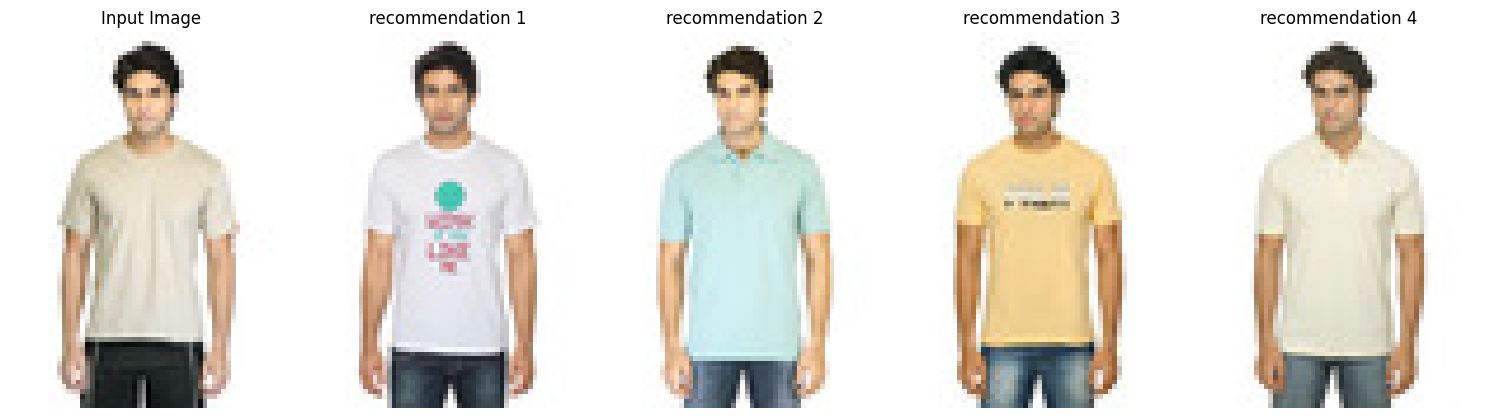

In [ ]:
input_image_path ='/content/myntradataset/images/25378.jpg'
recommend_fashion_item(input_image_path,all_features,image_path,model,top_n=4)